<a href="https://colab.research.google.com/github/yxyyxy93/NLP_Hillary-Clinton-and-Donald-Trump-Tweets/blob/master/NLP_Lab1_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine-Learning Based Natural Language Processing
# Lab 1 - Text Processing and Sentiment Analysis

---

## Outline

In this session, we will teach you how to approach processing a text-based dataset, with the goal of training a classifier, based on classical machine learning techniques. We've chosen __sentiment analysis__ as an application.

We will perform some preprocessing on data, see how to transform textual data into feature vectors, how to train several algorithms, as well as discuss evaluating the trained models.  We will make use of the sklearn machine learning library in python.  

These are the topics we will cover:

* ___Part 1 - Python for data (pre-)processing___
 * Basic data analytics
 * Text processing
* ___Part 2 - Sentiment Analysis___
 * Data Exploration
 * Text processing
 * Feature Extraction - __Exercise 1__
 * Classification Models - __Exercise 2__
 * Evaluation
 * Regularization - __Exercise 3__
 * Kaggle competition (*)

(\*) As a **bonus**, we'll have a friendly kaggle competition to see who can get the highest performance for sentiment prediction on a held out test set. We want you to critically think about how to improve and generalize your model's performance!!

# Part 1 - Python for data (pre)processing
---
Python is the most widely used programming language among data scientists and machine learning engineers, next to R, Matlab and SQL (although the latter is not a programming language in the strict sense). It is very readable and development times are usually quite fast, which makes it the perfect language to do rapid prototyping and to toy around with your ideas. It has also become an entire ecosystem on its own among data scientist: a plethora of GitHub data science repositories exist, which you can use in your own projects; if you have some data science problem, chances are people have already worked on it in the past and have open-sourced their code. And finally, Python is the language of choice if you want to experiment with deep learning -- the latest 'big leap' in machine learning -- since the most mature and most widely used frameworks PyTorch, Tensorflow and Keras provide very easy-to-use Python interfaces.

In this lab session, we will explore Python for (advanced) data processing and data analytics. We will focus on core Python modules and programming paradigms. The motivation is that, once you have good knowledge of the core Python modules, external modules such as NumPy, SciPy, Pandas, Seaborn... become much easier to learn and work with.

Today, we will use the _Hillary Clinton and Donald Trump 2016 US Presidential Election Twitter dataset_, an open dataset provided by Kaggle, containing ca. 6500 tweets. We will cover the following topics:
* Read the dataset in memory
* Calculate basic analytics on the dataset
* Make visual plots of dataset metrics
* Perform text cleaning on the tweets
* Identify distinct words in the tweets
* Create a basic AI that can auto-generate a tweet

**Remark**: this lab session is self-paced, and we hugely encourage that you go out on the internet and become big friends with _Google_ and _StackOverflow_. No one has complete knowledge of the entire Python core, let alone knowing the most efficient methods to achieve a certain result. If you have a basic Python problem (e.g., "how would I initialize a list of all zeros with a given length?") you will definitely and easily find multiple answers on the internet.

## 1. Basic data analytics
We have provided the dataset in csv format. Pandas will be used to read the dataset into memory. Pandas is a convenient module to visualize tabular datasets, and we will use it now in the beginning of this lab session to get a quick look at the data. Read the csv file using Pandas and visualize it in this notebook. You can also take a look at the official dataset website for more details on the dataset: https://www.kaggle.com/benhamner/clinton-trump-tweets

In [0]:
!wget "https://www.dropbox.com/s/octyjwtn4gwv7gm/data.zip?dl=1" -O data.zip
!unzip -o data.zip
!rm data.zip

--2020-02-29 15:43:24--  https://www.dropbox.com/s/octyjwtn4gwv7gm/data.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/octyjwtn4gwv7gm/data.zip [following]
--2020-02-29 15:43:24--  https://www.dropbox.com/s/dl/octyjwtn4gwv7gm/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc13828aee171fcc2921c3b08e69.dl.dropboxusercontent.com/cd/0/get/AzA2TaiSX2bj26k3QeK_7e-uoKI5CWmr-osSqQ2sCxbSLpa-pTURL3YktX75C6uIN7-YnrLOpA7bv_nc32s8FTyJTSsaOt_SOzKy2fc6jamxboSAVhxOLF8qHeBpWoD8hiE/file?dl=1# [following]
--2020-02-29 15:43:25--  https://uc13828aee171fcc2921c3b08e69.dl.dropboxusercontent.com/cd/0/get/AzA2TaiSX2bj26k3QeK_7e-uoKI5CWmr-osSqQ2sCxbSLpa-pTURL3YktX75C6uIN7-YnrLOpA7bv_nc32s8FTyJTSsaOt_SOzKy2fc6jamxboSAVhxOLF8qH

We will now use Python's own built-in `csv` module to read and process the csv file. To store the tweets in memory, we will write our own Tweet class in which we can store the data in a structured fashion. Study the code of the Tweet class below; we have already written the constructor `__init__` method that stores all necessary data as atrributes in the object.

Complete the `__str__()` function that can be used to "pretty print" a Tweet object (e.g., print its ID, handle and text in a nice format).

In [0]:
class Tweet:
    def __init__(self, tweet_id, handle, text, is_retweet, original_author, time, lang, retweet_count, favorite_count):
        self.tweet_id = tweet_id
        self.handle = handle
        self.text = text
        self.is_retweet = is_retweet == 'True'
        self.original_author = original_author
        self.time = time
        self.lang = lang
        self.retweet_count = int(retweet_count)
        self.favorite_count = int(favorite_count)
    
    def __str__(self):
        return self.tweet_id + ' / ' + self.handle + ": " + self.text

Now use the `csv` module to read the csv dataset row by row. For each row, create a Tweet object and store it in a list. This list will be our dataset. Use the official Python docs as inspiration: https://docs.python.org/3.6/library/csv.html.

### 1.1 Warm-up questions
Again, as a reminder, Google and StackOverflow are your friends!

**Question:** How many tweets are there in the dataset?

import csv

dataset = []
with open('tweets_stripped.csv', 'r') as data_file:
    datareader = csv.reader(data_file, delimiter=',', quotechar='"')
    for i, row in enumerate(datareader):
        if i > 0:
            t = Tweet(row[0], row[1], row[2], row[3], row[4], row[5], row[10], row[11], row[12])
            dataset.append(t)

In [0]:
import csv

dataset = []
with open('tweets_stripped.csv', 'r') as data_file:
    datareader = csv.reader(data_file, delimiter=',', quotechar='"')
    for i, row in enumerate(datareader):
        if i > 0:
            t = Tweet(row[0], row[1], row[2], row[3], row[4], row[5], row[10], row[11], row[12])
            dataset.append(t)

In [0]:
## Answer Q1
tweets_num = len(dataset)

print(tweets_num, ' tweets are there in the dataset')


6444  tweets are there in the dataset


**Question:** How many of these tweets are retweets? Give an absolute number and percentage. Also: what percentage of tweets are from Hillary and from Trump?

For this question you can use for-loops, but Python has a very compact and powerful syntax called a _list comprehension_. Toy around with the examples below, and then tackle the question.

Alternatively, use a pandas dataframe (see, e.g., https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/)

In [0]:
a = [1,2,3,4,5,6]
print(a)
b = [(x + 1) for x in a]
print(b)
c = [x**2 for x in range(10)]
print(c)
print(sum(c))

[1, 2, 3, 4, 5, 6]
[2, 3, 4, 5, 6, 7]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
285


In [0]:
## Answer Q2
retweets = [x.is_retweet for x in dataset]

count_r = retweets.count(True)
print('1:')
print('The count of retweets is:', count_r)


per_r = count_r/tweets_num
print('2:')
print('The percentage of retweets is:', per_r)

author = [x.handle for x in dataset]

print('3:')
per_h = author.count('HillaryClinton')
print('percentage of tweets from HillaryClinton is: ', per_h/tweets_num)
per_h = author.count('realDonaldTrump')
print('percentage of tweets from realDonaldTrumpis: ', per_h/tweets_num)

del count_r, per_r, per_h, author

1:
The count of retweets is: 722
2:
The percentage of retweets is: 0.11204220980757294
3:
percentage of tweets from HillaryClinton is:  0.5006207324643079
percentage of tweets from realDonaldTrumpis:  0.4993792675356921


**Question 3.** Which tweet was the most popular in terms of retweets? And what is the top 3 most popular tweets? Once found, you can look up the original tweet on Twitter by filling in the correct handle and id in the following URL: https://twitter.com/{handle}/status/{id}

For this question, you can also use for loops to find the most popular tweet. Python, however, has good support for sorting datastructures. Take a look below how the built-in `sorted()` function works. (Alternatively, use pandas `sort_values()` on the pandas dataframe.)

In [0]:
a = ['bbbbb', 'ee', 'aaa', 'cccc', 'd']
print(sorted(a))
print(sorted(a, reverse=True))
print(sorted(a, key=lambda x:len(x)))

['aaa', 'bbbbb', 'cccc', 'd', 'ee']
['ee', 'd', 'cccc', 'bbbbb', 'aaa']
['d', 'ee', 'aaa', 'cccc', 'bbbbb']


In [0]:
## Answer Q3
import pandas as pd

# read data as pandas dataframe
df_origin = pd.read_csv('tweets_stripped.csv')
# print(df_origin.columns)

df_sort = df_origin.sort_values('retweet_count', ascending=False)

print('1:')
print('most popular tweet in terms of retweets is')
print(dataset[df_sort.index[0]].__str__())
print('2:')
print('top 3 most popular tweets are')
for idx in range(3):
  print(dataset[df_sort.index[idx]].__str__())

del df_sort

1:
most popular tweet in terms of retweets is
740973710593654784 / HillaryClinton: Delete your account. https://t.co/Oa92sncRQY
2:
top 3 most popular tweets are
740973710593654784 / HillaryClinton: Delete your account. https://t.co/Oa92sncRQY
741007091947556864 / realDonaldTrump: How long did it take your staff of 823 people to think that up--and where are your 33,000 emails that you deleted? https://t.co/gECLNtQizQ
755788382618390529 / realDonaldTrump: The media is spending more time doing a forensic analysis of Melania's speech than the FBI spent on Hillary's emails.


**Question:** Who (Trump or Hillary) gets the most retweets on average? And based on the median value?

In [0]:
## Answer Q4
temp = df_origin.groupby('handle')['retweet_count'].mean()
print('1:')
print('Who (Trump or Hillary) gets the most retweets on average:', temp.idxmax())

temp = df_origin.groupby('handle')['retweet_count'].median()
print('2:')
print('Who (Trump or Hillary) gets the most retweets on median value:', temp.idxmax())

del temp

1:
Who (Trump or Hillary) gets the most retweets on average: realDonaldTrump
2:
Who (Trump or Hillary) gets the most retweets on median value: realDonaldTrump


### 1.2 Data visualisation

We'll now illustrate some visualizations of the data with Matplotlib and Pyplot. Matplotlib is the fundamental visualisation tool in Python, and Pyplot is an abstraction layer on top of Matplotlib in such a way that Matlab users feel right at home. These modules are, however, not a part of the core Python framework and should be installed separately.

Below we show the needed imports. In order to visualise the plots in the notebook, we use a jupyter-specific syntax `%matplotlib inline` to tell the engine to render the images right within the notebook.

(Note: As an alternative to matplotlib, especially for people familiar with [ggplot](https://ggplot2.tidyverse.org/) in R, you may want to explore, e.g., the [plotnine library](https://plotnine.readthedocs.io/en/stable/#) in python.)

In [0]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Below we show some basic plotting examples that you can play with, but you must realise that plotting is always a matter of trial and error, and requires frequent searches on Google and StackOverflow for existing recipes that you can use.

##### Line plots

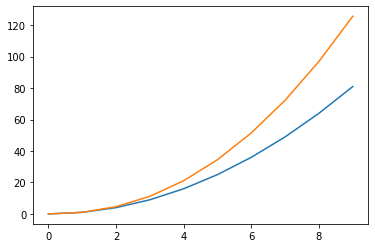

In [0]:
import math

x = range(10)
y = [i**2 for i in x]
yy = [i**2.2 for i in x]

plt.clf()         # clear figure
plt.plot(x, y)    # draw a plot
plt.plot(x, yy)   # draw another plot
plt.show()        # show the figure

##### Histograms

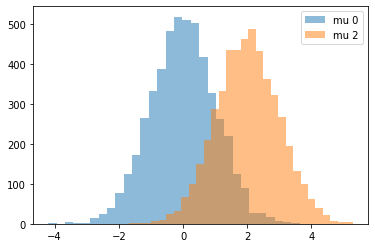

In [0]:
import random

d = [random.gauss(0, 1) for i in range(5000)]
e = [random.gauss(2, 1) for i in range(5000)]

plt.clf()
# draw histogram, give them labels, set opacity to 0.5
plt.hist(d, bins=30, label='mu 0', alpha=0.5)
plt.hist(e, bins=30, label='mu 2', alpha=0.5)
# draw legend
plt.legend()
plt.show()

##### Bar charts

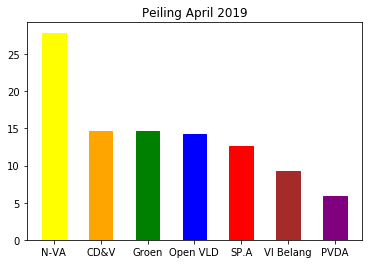

In [0]:
x_values = ['N-VA', 'CD&V', 'Groen', 'Open VLD', 'SP.A', 'Vl Belang', 'PVDA']
y_values = [27.9, 14.7, 14.6, 14.2, 12.7, 9.3, 5.9]
colors = ['yellow', 'orange', 'green', 'blue', 'red', 'brown', 'purple']

plt.clf()
# set the plot title
plt.title("Peiling April 2019")
# create a bar chart
barlist = plt.bar(x=x_values, width=0.5, height=y_values)
# set the colors of each bar
for i in range(len(x_values)):
    barlist[i].set_color(colors[i])
plt.show()

### Visualisation exercises
Again, Google and StackOverflow are your friends!

Example 1. Generate a line plot of the tweet volume per each month for each candidate.

To get the month in which a tweet was sent, take a look at Python's powerful `datetime` module!

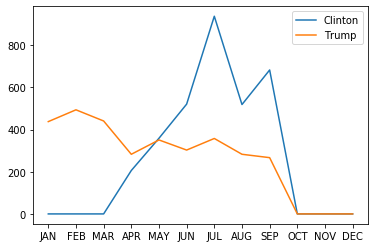

In [0]:
import datetime as dt

# Code for Example 1

tweet_volume = {
    'HillaryClinton': [0]*12,
    'realDonaldTrump': [0]*12
}

for t in dataset:
    tweet_month = dt.datetime.strptime(t.time, '%Y-%m-%dT%H:%M:%S').month - 1
    tweet_volume[t.handle][tweet_month] += 1
    
plt.clf()
plt.plot(tweet_volume['HillaryClinton'], label='Clinton')
plt.plot(tweet_volume['realDonaldTrump'], label='Trump')
plt.xticks(range(0,12), ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.legend()
plt.show()

Example 2. Do the same, but now use a bar chart. Example:
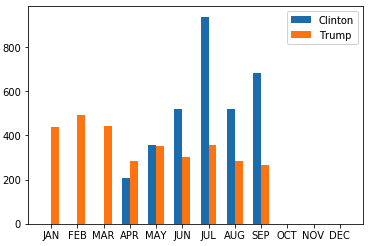

You will notice that preparing the x-values is quite cumbersome and not flexible enough. That's why we will use histograms in the next assignment.

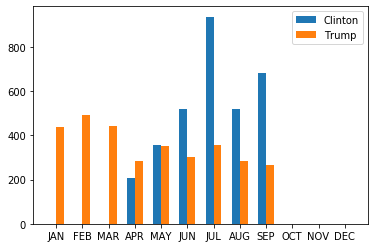

In [0]:
# Example 2:

x_values = range(0, 12)

plt.clf()
plt.bar(x=x_values, width=0.3, height=tweet_volume['HillaryClinton'], label='Clinton')
plt.bar(x=[k+0.3 for k in x_values], width=0.3, height=tweet_volume['realDonaldTrump'], label='Trump')

plt.xticks([k+0.15 for k in x_values], ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

plt.legend()
plt.show()

Example 3: Maybe dividing the time axis on a monthly level is too coarse. Histograms have the powerful capacity of easily tuning the number of bins, so that we can go as coarse or as fine-grained as we want. We now create a histogram of tweet volume as a function of time, per candidate.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

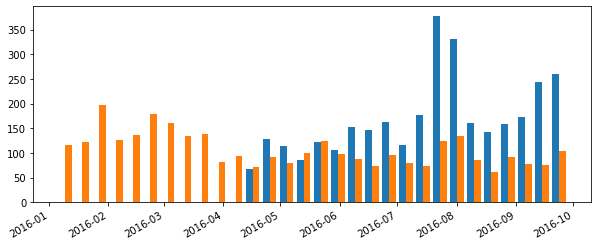

In [0]:
# Example 3:

tweet_dates = {
    'HillaryClinton': [],
    'realDonaldTrump': []
}

for t in dataset:
    tweet_date = dt.datetime.strptime(t.time, '%Y-%m-%dT%H:%M:%S')
    tweet_dates[t.handle].append(tweet_date)
    

plt.clf()
plt.figure(figsize=(10,4))
plt.hist([tweet_dates['HillaryClinton'], tweet_dates['realDonaldTrump']], bins=30)
plt.gcf().autofmt_xdate()
plt.show()

**Question:** What are the Twitter accounts that Hillary Clinton retweets? Create a bar chart for the accounts that were retweeted at least 5 times. Create the same graph for Trump. Who is retweeting most?

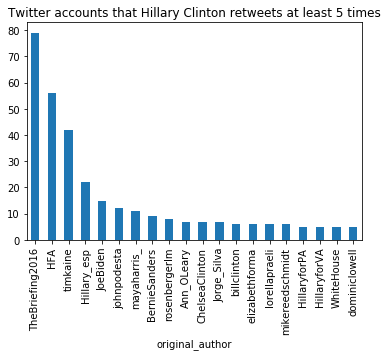

In [0]:
## Answer Q4 (part 1: Hillary Clinton)
# bar chart

temp = df_origin.groupby('handle')['original_author'].value_counts()
temp = temp[temp>=5]
temp['HillaryClinton'].plot(kind='bar', width=0.5, title='Twitter accounts that Hillary Clinton retweets at least 5 times')

del temp

Hillary is retweeting most


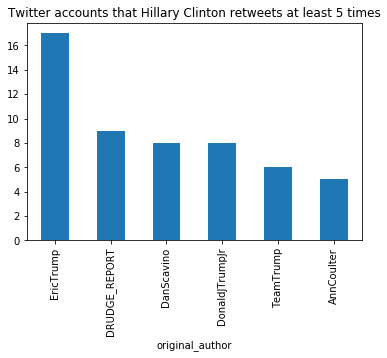

In [0]:
## Answer Q4 (part 2: Donald Trump)

temp = df_origin.groupby('handle')['original_author'].value_counts()
temp = temp[temp>=5]
temp['realDonaldTrump'].plot(kind='bar', width=0.5, title='Twitter accounts that Hillary Clinton retweets at least 5 times')

del temp

print('Hillary is retweeting most')

## 2. Text Processing
### 2.1 Cleaning and preprocessing

In the remainder of the lab session, we will focus on textual data. Performing analytics, business intelligence, machine learning, etc. on (written) text is called _Natural Language Processing (NLP)_ in academics. In the next few exercises we will learn the necessary skills and steps in preparing and transforming text into useful data that can be used in a wide variety of powerful machine learning applications.

### 2.1.1 Theory
The very first step in NLP is _preprocessing_, that is, preparing the raw textual data such that we get rid of (most of the) noise and retain the most informative signal. Consider for example the following tweet, and how we can apply multiple possible preprocessing steps to arrive at a noise-free tweet. __All steps are optional__ and one should always consider the application at hand to determine which preprocessing steps are needed!

> HEY @UGentstudent! This isn't a clean #NLP tweet :-D http://www.ugent.be

__Step 1__ - Convert all characters to lowercase. By doing this, the words _'This'_ and _'this'_ become the same, which is what we want.

> hey @ugentstudent! this isn't a clean #nlp tweet :-d http://www.ugent.be

__Step 2__ - Apply normalization, for example:
 * Replacing all numbers by a single character, e.g. 0.
 * Replacing all characters with accents by their clean counterpart, e.g. é becomes e.
 * Expanding popular contractions such as _"isn't"_ to _"is not"_.
 * ...

> hey @UGentstudent! this is not a clean #nlp tweet :-D http://www.ugent.be

__Step 3__ - Remove unwanted words, punctuation, URLs, whitespaces... For example, we could choose to only retain alphanumerical chatacters, but this always depends on the application at hand. In our case, we will want to keep hashtags and mentions, but remove URLs and emoticons/emojis.

> hey @UGentstudent! this is not a clean #nlp tweet

__Step 4__ - Splitting the text into separate words. This is a process called _tokenization_ and there exist many different methods of tokenizing a text. The most simple method finds all whitespaces and uses them to split the text. More advanced tokenizers also take into account punctuation and other textual markers.

> ['hey', '@UGentstudent', '!', 'this', 'is', 'not', 'a', 'clean', '#nlp', 'tweet']

__Step 5__ - Remove stop words. These are words that hardly contribute to the meaning of a text, such as "the", "a", "an", "is", "and", "our", etc. There are lists available of common stop words in English (e.g. https://gist.github.com/sebleier/554280 ). Some lists include words such as "not", but such words can shape the semantic meaning of a text, so always be careful which words get removed from your text.

> ['hey', '@UGentstudent', '!', 'not', 'clean', '#nlp', 'tweet']

__Step 6__ - In some applications (such a document classification) it can also be useful to apply _stemming_ to the text (https://en.wikipedia.org/wiki/Stemming ). Stemming essentially means that words are normalized, such that for example "fishing", "fished" and "fisher" all reduce to the same stem "fish". There exist many stemming algorithms (such as Porter stemming), but we will not cover stemming in this lab session.

### 2.1.2 Regular expressions
URLs appear very often in tweets and contribute almost no semantic message. It is essentially noise, and we therefore want to remove them. For this purpose, we will use regular expressions, a powerful string processing tool and syntax that is available in almost all high-level programming languages. Regular expressions (regex in short) can be very daunting to work with and can be a complete course on its own! Luckily there are useful online tools such as RegexPlanet (www.regexplanet.com) and StackOverflow that can help you in the process.

As an examplary exercise, we will remove all non alphanumeric characters from our tweet using regexes. Consider the following examples, play with them, and after that, try to come up with a way of removing all non-alphanumeric characters from our tweet (but keeping the spaces).

In [0]:
import re

print(re.sub(r'de', '', 'abcde'))           #abc
print(re.sub(r'[ae]', '', 'abcde'))         #bcd
print(re.sub(r'[a-c]', '', 'abcde'))        #de
print(re.sub(r'[a-bd-e]', '', 'abcde'))     #c
print(re.sub(r'[^a-b]', '', 'abcde'))       #ab
print(re.sub(r'a*', '', 'aaaabbc'))         #bbc
print(re.sub(r'a?bbb', '', 'aabbbbc'))      #abc
print(re.sub(r'a+bbb', '', 'aabbbbc'))      #bc
print(re.sub(r'[^a-e]', '_', 'AaBbCcDdEe')) #_a_b_c_d_e

abc
bcd
de
c
ab
bbc
abc
bc
_a_b_c_d_e


In [0]:
original_tweet = "HEY @UGentstudent! This isn't a clean #NLP tweet :-D http://www.ugent.be"
print(re.sub(r'[^a-zA-Z0-9\s]', '', original_tweet))
print(re.sub(r'[^\w\s]', '', original_tweet))

HEY UGentstudent This isnt a clean NLP tweet D httpwwwugentbe
HEY UGentstudent This isnt a clean NLP tweet D httpwwwugentbe


As stated above, we could teach hours on regular expressions alone. A nice layout of what regexes can do in Python, is given in the official documentation: https://docs.python.org/3/howto/regex.html. Some useful shortcuts are given there: `\s` stands for any whitespace character, `\d` stands for a digit, `\w` stands for any alphanumberic character, `.` stands for any character.

Here is a regular expression that can be used to remove URLs from a piece of text, and we test it on the original tweet above:

In [0]:
original_tweet = "HEY @UGentstudent! This isn't a clean #NLP tweet :-D http://www.ugent.be"
url_regex = r'https?://\S+'
# or (more complex and more general):
# url_regex = r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*'

re.sub(url_regex, '', original_tweet)

"HEY @UGentstudent! This isn't a clean #NLP tweet :-D "

The following example uses a regular expression to replace all numbers (i.e. one or more digits) with a single character '0' in a given text.

In [0]:
number_regex = r'\d+'

re.sub(number_regex, '0', '1, 2, 3 up to 45678.90')

'0, 0, 0 up to 0.0'

Now, we find all non-alphanumeric characters in the whole dataset. For this purpose, we use the `set` datastructure.

In [0]:
punct = set()
for t in dataset:
    purged_tweet = re.sub(r'\w', '', t.text).strip()
    if len(purged_tweet) > 0:
        for character in purged_tweet:
            punct.add(character)

print(punct)

{'@', '👿', "'", ']', '*', '👈', '💁', '\u200b', '&', '\xa0', '(', '❤', '🏿', '📚', '❌', ' ', '🎓', '̶', '’', '…', '👸', '$', '🎧', '🗽', '[', '|', '✓', ';', ',', '👇', '‘', '️', '.', '💨', '!', '?', '=', '/', '🐣', '🏽', ':', '“', '¡', '\u200a', '✔', '👀', '🌈', '\n', '🇺', '💪', '"', ')', '👉', '~', '👍', '👏', '-', '%', '🤔', '–', '👎', '🏼', '🇸', '🍕', '⬇', '🤖', '#', '¿', '🏻', '®', '🎤', '”', '🚂', '+', '—', '→', '🏡', '✅', '🏾', '•'}


#### 2. Cleaning tweets
We will now extend the Tweet class by writing a new function that performs all necessary text cleaning for that tweet. We will save the cleaned text as a new variable in the object.

**Question:** Copy the code of the Tweet class above and write a new method `clean(self)`. This method will perform a series of cleaning operations on the tweet's text. The resulting cleaned text is saved as a new attribute `self.cleaned_text` of that class. Do the following cleaning operations in given order:

1. Convert the original text to lowercase.
2. Remove URLs.
3. Replace all numbers by 0.
4. Remove punctuation, but __be careful not to lose whitespaces, #, @, ' (single quote)__. For this you can use the set of non-alphanumeric characters you have found above! Since a lot of punctuation characters start with a backslash, it is easier to use the built-in `replace()` function on a Python string to remove a punctuation character.
5. Replace all whitespace with a single space.
6. Make sure the whitespaces at the beginning and end of the tweet are removed (look at the `strip()` function).

Afterwards, import the CSV file again, and perform cleaning on all tweets. Take a look at the resulting cleaned texts and fix any mistakes: data cleaning is always an iterative process in which you improve your cleaning algorithm step by step.

In [0]:
punct = {'💁', '[', '’', '~', '💪', '📚', '🏡', '-', '🐣', '🇺', '”', '̶', '\u200a', ';', '🍕', ' ', '!', '%', ',', '👇', '®', '🌈', '?', '🏽', '=', '💨', '✅', '✔', ')', '|', '‘', '\xa0', '🗽', '&', '🏼', '¿', '…', '🎓', '👉', '❌', '🎧', '👈', '🚂', '+', '🤖', '👎', '→', '¡', '🤔', '️', '👸', '@', '🇸', ':', '“', '•', '🏿', '🏻', '👀', '👏', '—', ']', '✓', '"', '\u200b', '🎤', '\n', '.', '(', '$', '❤', '⬇', '#', '👍', "'", '/', '*', '🏾', '–', '👿'}

punct.remove(' ')  # keep spaces
punct.remove('#')  # keep hashtags
punct.remove('@')  # keep mentions
punct.remove('\'') # keep single quotes (in order to retain I'm, isn't, etc.)

class Tweet:    
    def __init__(self, tweet_id, handle, text, is_retweet, original_author, time, lang, retweet_count, favorite_count):
        self.tweet_id = tweet_id
        self.handle = handle
        self.text = text
        self.is_retweet = is_retweet == 'True'
        self.original_author = original_author
        self.time = time
        self.lang = lang
        self.retweet_count = int(retweet_count)
        self.favorite_count = int(favorite_count)
        
    def __str__(self):
        return self.tweet_id + ' / ' + self.handle + ": " + self.text
    
    def clean(self):
        pass
        ## Answer: add function to clean tweets:

        # Convert the original text to lowercase.
        self.cleaned_text = self.text.lower()

        # Remove URLs.
        url_regex = r'https?://\S+'
        self.cleaned_text = re.sub(url_regex, '', self.cleaned_text)

        # Replace all numbers by 0.
        number_regex = r'\d+'
        self.cleaned_text = re.sub(number_regex, '0', self.cleaned_text)

        # Remove punctuation, but be careful not to lose whitespaces, #, @, ' (single quote). 
        # For this you can use the set of non-alphanumeric characters you have found above! Since a lot of punctuation characters start with a backslash.
        # it is easier to use the built-in replace() function on a Python string to remove a punctuation character.
        for x in self.cleaned_text: 
          if x in punct: 
            self.cleaned_text = self.cleaned_text.replace(x, "") 

        # Replace all whitespace with a single space.
        self.cleaned_text = re.sub(' +', ' ', self.cleaned_text)

        # Make sure the whitespaces at the beginning and end of the tweet are removed (look at the strip() function).
        self.cleaned_text = self.cleaned_text.strip(' ')


In [0]:
dataset = []

punct = {'💁', '[', '’', '~', '💪', '📚', '🏡', '-', '🐣', '🇺', '”', '̶', '\u200a', ';', '🍕', ' ', '!', '%', ',', '👇', '®', '🌈', '?', '🏽', '=', '💨', '✅', '✔', ')', '|', '‘', '\xa0', '🗽', '&', '🏼', '¿', '…', '🎓', '👉', '❌', '🎧', '👈', '🚂', '+', '🤖', '👎', '→', '¡', '🤔', '️', '👸', '@', '🇸', ':', '“', '•', '🏿', '🏻', '👀', '👏', '—', ']', '✓', '"', '\u200b', '🎤', '\n', '.', '(', '$', '❤', '⬇', '#', '👍', "'", '/', '*', '🏾', '–', '👿'}

punct.remove(' ')  # keep spaces
punct.remove('#')  # keep hashtags
punct.remove('@')  # keep mentions
punct.remove('\'') # keep single quotes (in order to retain I'm, isn't, etc.)

with open('tweets_stripped.csv', 'r') as data_file:
    datareader = csv.reader(data_file, delimiter=',', quotechar='"')
    for i, row in enumerate(datareader):
        if i > 0:
            t = Tweet(row[0], row[1], row[2], row[3], row[4], row[5], row[10], row[11], row[12])
            t.clean()
            dataset.append(t)

for t in dataset[:5]:
    print(t.cleaned_text)

the question in this election who can put the plans into action that will make your life better
last night donald trump said not paying taxes was smart you know what i call it unpatriotic
couldn't be more proud of @hillaryclinton her vision and command during last night's debate showed that she's ready to be our next @potus
if we stand together there's nothing we can't do make sure you're ready to vote
both candidates were asked about how they'd confront racial injustice only one had a real answer


#### 3. Tokenization
Tokenization is the process of splitting a text into a sequence of separate words. It is an essential step in NLP, since words are the most basic building blocks that provide a meaning or sentiment to any text. Natural language models often therefore often work with words as input features (although in some models the characters itself are used instead of words).

The most basic type of tokenization is to split the text whenever a whitespace occurs. Take a look at the `split()` function and use it to tokenize the given text:

In [0]:
tweet_text = "couldn't be more proud of @hillaryclinton her vision and command during last night's debate showed that she's ready to be our next @potus"

tweet_tokens = tweet_text.split(" ")
print(tweet_tokens)

["couldn't", 'be', 'more', 'proud', 'of', '@hillaryclinton', 'her', 'vision', 'and', 'command', 'during', 'last', "night's", 'debate', 'showed', 'that', "she's", 'ready', 'to', 'be', 'our', 'next', '@potus']


It works pretty well already, but some tokens such as _"couldn't"_ are ideally expanded to _"could"_ and _"not"_. NLTK is Python's Natural Language ToolKit that contains many methods and algorithms to tokenize a text. For example:

In [0]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

tweet_tokens = word_tokenize(tweet_text)
print(tweet_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['could', "n't", 'be', 'more', 'proud', 'of', '@', 'hillaryclinton', 'her', 'vision', 'and', 'command', 'during', 'last', 'night', "'s", 'debate', 'showed', 'that', 'she', "'s", 'ready', 'to', 'be', 'our', 'next', '@', 'potus']


**Question:** Take a look at the official NLTK documentation (https://www.nltk.org/api/nltk.tokenize.html) and you will notice that it contains a specific Twitter-aware tokenizer. Use it to tokenize the tweet.

In [0]:
from nltk.tokenize import TweetTokenizer

## Answer: tokenize tweet with TweetTokenizer

tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

for tweet_obj in dataset[0:5]:
  print(tweet_obj.cleaned_text)
  print(tknzr.tokenize(tweet_obj.cleaned_text))


the question in this election who can put the plans into action that will make your life better
['the', 'question', 'in', 'this', 'election', 'who', 'can', 'put', 'the', 'plans', 'into', 'action', 'that', 'will', 'make', 'your', 'life', 'better']
last night donald trump said not paying taxes was smart you know what i call it unpatriotic
['last', 'night', 'donald', 'trump', 'said', 'not', 'paying', 'taxes', 'was', 'smart', 'you', 'know', 'what', 'i', 'call', 'it', 'unpatriotic']
couldn't be more proud of @hillaryclinton her vision and command during last night's debate showed that she's ready to be our next @potus
["couldn't", 'be', 'more', 'proud', 'of', 'her', 'vision', 'and', 'command', 'during', 'last', "night's", 'debate', 'showed', 'that', "she's", 'ready', 'to', 'be', 'our', 'next']
if we stand together there's nothing we can't do make sure you're ready to vote
['if', 'we', 'stand', 'together', "there's", 'nothing', 'we', "can't", 'do', 'make', 'sure', "you're", 'ready', 'to', 'v

One reason to use Python for machine learning (and NLP) is that thousands of fellow computer scientists and researchers are using it as well for that purpose. Chances are that whatever problem you are trying to tackle, someone has done it already. Regarding tweet tokenization, there are numerous GitHub projects to be found that have solved this problem, some better or more user-friendly than others. We have had pretty good experience with the following GitHub repository: https://github.com/erikavaris/tokenizer.

**Question:** Take a look at the install instructions, install the package, and after that use the package to tokenize the tweet. Also, the package allows for text normalization, thereby expanding _"couldn't"_ into _"could"_ and _"not"_. You can find out how by taking a look at the documentation.

In [0]:
# install 
! pip install git+https://github.com/erikavaris/tokenizer.git

  Cloning https://github.com/erikavaris/tokenizer.git to /tmp/pip-req-build-2ldnwvty
  Running command git clone -q https://github.com/erikavaris/tokenizer.git /tmp/pip-req-build-2ldnwvty
  Created wheel for tokenizer: filename=tokenizer-1.0.1-cp36-none-any.whl size=12978 sha256=5a05f40b9a3766f90a84e7dd980a70401309b941482fbaf6d3fba5995594bd7b
  Stored in directory: /tmp/pip-ephem-wheel-cache-934p2iwz/wheels/47/e7/9b/7f3e9b2989a5600b42ffbcc0fd8687562b1738f585f6bd92fa
Successfully built tokenizer


In [0]:
## Answer:

from tokenizer import tokenizer

T = tokenizer.TweetTokenizer(regularize=True, preserve_handles=False, preserve_hashes=False)

for tweet_obj in dataset[0:5]:
  print(tweet_obj.cleaned_text)
  print(T.tokenize(tweet_obj.cleaned_text))


the question in this election who can put the plans into action that will make your life better
['the', 'question', 'in', 'this', 'election', 'who', 'can', 'put', 'the', 'plans', 'into', 'action', 'that', 'will', 'make', 'your', 'life', 'better']
last night donald trump said not paying taxes was smart you know what i call it unpatriotic
['last', 'night', 'donald', 'trump', 'said', 'not', 'paying', 'taxes', 'was', 'smart', 'you', 'know', 'what', 'i', 'call', 'it', 'unpatriotic']
couldn't be more proud of @hillaryclinton her vision and command during last night's debate showed that she's ready to be our next @potus
['could', 'not', 'be', 'more', 'proud', 'of', 'her', 'vision', 'and', 'command', 'during', 'last', "night's", 'debate', 'showed', 'that', 'she', 'is', 'ready', 'to', 'be', 'our', 'next']
if we stand together there's nothing we can't do make sure you're ready to vote
['if', 'we', 'stand', 'together', "there's", 'nothing', 'we', 'can', 'not', 'do', 'make', 'sure', 'you', 'are', 

Keep in mind that tokenization is never perfect, and should be tuned to your application at hand!

**Question:** Now, again, copy the Tweet class in the cell below and write a `tokenize(self)` function. Store the resulting tokens in the `self.tokens` attribute.

In [0]:
## Answer: extend Tweet class with tokenize function:

class Tweet:    
    def __init__(self, tweet_id, handle, text, is_retweet, original_author, time, lang, retweet_count, favorite_count):
        self.tweet_id = tweet_id
        self.handle = handle
        self.text = text
        self.is_retweet = is_retweet == 'True'
        self.original_author = original_author
        self.time = time
        self.lang = lang
        self.retweet_count = int(retweet_count)
        self.favorite_count = int(favorite_count)
        self.cleaned_text = None
        self.tokens = None
        
    def __str__(self):
        return self.tweet_id + ' / ' + self.handle + ": " + self.text
    
    def clean(self):
        pass
        ## Answer: add function to clean tweets:

        # Convert the original text to lowercase.
        self.cleaned_text = self.text.lower()

        # Remove URLs.
        url_regex = r'https?://\S+'
        self.cleaned_text = re.sub(url_regex, '', self.cleaned_text)

        # Replace all numbers by 0.
        number_regex = r'\d+'
        self.cleaned_text = re.sub(number_regex, '0', self.cleaned_text)

        # Remove punctuation, but be careful not to lose whitespaces, #, @, ' (single quote). 
        # For this you can use the set of non-alphanumeric characters you have found above! Since a lot of punctuation characters start with a backslash.
        # it is easier to use the built-in replace() function on a Python string to remove a punctuation character.
        for x in self.cleaned_text: 
          if x in punct: 
            self.cleaned_text = self.cleaned_text.replace(x, "") 

        # Replace all whitespace with a single space.
        self.cleaned_text = re.sub(' +', ' ', self.cleaned_text)

        # Make sure the whitespaces at the beginning and end of the tweet are removed (look at the strip() function).
        self.cleaned_text = self.cleaned_text.strip(' ')

    def tokenize(self):
        T = tokenizer.TweetTokenizer(regularize=True, preserve_handles=False, preserve_hashes=False, preserve_len=False)
        self.tokens = T.tokenize(self.cleaned_text)


Now, test the tokenization on the tweet dataset:

In [0]:
from tokenizer import tokenizer

punct = {'💁', '[', '’', '~', '💪', '📚', '🏡', '-', '🐣', '🇺', '”', '̶', '\u200a', ';', '🍕', ' ', '!', '%', ',', '👇', '®', '🌈', '?', '🏽', '=', '💨', '✅', '✔', ')', '|', '‘', '\xa0', '🗽', '&', '🏼', '¿', '…', '🎓', '👉', '❌', '🎧', '👈', '🚂', '+', '🤖', '👎', '→', '¡', '🤔', '️', '👸', '@', '🇸', ':', '“', '•', '🏿', '🏻', '👀', '👏', '—', ']', '✓', '"', '\u200b', '🎤', '\n', '.', '(', '$', '❤', '⬇', '#', '👍', "'", '/', '*', '🏾', '–', '👿'}

punct.remove(' ')  # keep spaces
punct.remove('#')  # keep hashtags
punct.remove('@')  # keep mentions
punct.remove('\'') # keep single quotes (in order to retain I'm, isn't, etc.)

dataset = []

with open('tweets_stripped.csv', 'r') as data_file:
    datareader = csv.reader(data_file, delimiter=',', quotechar='"')
    for i, row in enumerate(datareader):
        if i > 0:
            t = Tweet(row[0], row[1], row[2], row[3], row[4], row[5], row[10], row[11], row[12])
            t.clean()
            t.tokenize()
            dataset.append(t)

for t in dataset[:5]:
    print(t.tokens)


['the', 'question', 'in', 'this', 'election', 'who', 'can', 'put', 'the', 'plans', 'into', 'action', 'that', 'will', 'make', 'your', 'life', 'better']
['last', 'night', 'donald', 'trump', 'said', 'not', 'paying', 'taxes', 'was', 'smart', 'you', 'know', 'what', 'i', 'call', 'it', 'unpatriotic']
['could', 'not', 'be', 'more', 'proud', 'of', 'her', 'vision', 'and', 'command', 'during', 'last', "night's", 'debate', 'showed', 'that', 'she', 'is', 'ready', 'to', 'be', 'our', 'next']
['if', 'we', 'stand', 'together', "there's", 'nothing', 'we', 'can', 'not', 'do', 'make', 'sure', 'you', 'are', 'ready', 'to', 'vote']
['both', 'candidates', 'were', 'asked', 'about', 'how', "they'd", 'confront', 'racial', 'injustice', 'only', 'one', 'had', 'a', 'real', 'answer']


#### 4. Building a vocabulary
For machine learning models it is important that datapoints have a numerical representation. Many machine learning models are vector-based, and each class of data has is assigned to its own dimension in these vectors. What this means for us now, is that each word should be mapped to its own unique positive integer value. For example, consider a dictionary of the entire English language, then each word can be mapped to the position of that word in the dictionary. The sentence _"proud of hillary"_ can then be represented as a sequence of indices, e.g. [243, 5, 8723]. In other words, the text is transformed into a mathematical representation, which opens the gate to all sorts of powerful machine learning methods and models. Such models will be explored in the next lab session, which is why we cover vocabulary building here.

We will now build a vocabulary for the Twitter dataset. This vocabulary will be used throughout the remainder of the lab session.

**Question:** Use the `set` datastructure to find all unique words in the dataset, thereby using the tokenized tweets. How big is the vocabulary?

In [0]:
## Answer:
vocabulary = set()

for t in dataset:
  vocabulary.update(t.tokens)

print('the size of the vocabulary is: ', len(vocabulary))

the size of the vocabulary is:  9411


**Question:** Now create a dictionary `word_to_ix` which maps a word to a unique index (from 0 up to the length of the vocabulary). Also, create a dictionary `ix_to_word` which does the opposite mapping. Check if you can translate a word to an index, and use that index to find the original word again. What is the theoretical time complexity of a dictionary lookup?

In [0]:
## Answer part 1: create word_to_ix and ix_to_word
word_to_ix = {k: v for v, k in enumerate(vocabulary)}
print('size of word_to_ix is ', len(word_to_ix))

ix_to_word = {v: k for v, k in enumerate(vocabulary)}
print('size of ix_to_word is ', len(word_to_ix))

# test translation
words = random.sample(vocabulary, 5) # select 5 words randomly
print('the selected words are', words)
ix = []
for key in words:
  ix.append(word_to_ix[key])
print('the indexes of the words are ', ix)

# use that index to find the original word again
words_back =[]
for key in ix:
  words_back.append(ix_to_word[key])
print('the indexes of the words are ', words_back)
print('***********************')
print('the theoretical time complexity of a dictionary lookup:')
print('The dictionary is a hashmap using built-in hashing functions.\n\
The theoretical time complexity of a dictionary lookup is O(1) on average, and O(N) in worst case.')

size of word_to_ix is  9411
size of ix_to_word is  9411
the selected words are ['votetrumpnv', 'astonishing', 'switched', 'makeamericagreatagainvotersspeak', 'samsung']
the indexes of the words are  [1605, 1684, 5911, 2379, 4992]
the indexes of the words are  ['votetrumpnv', 'astonishing', 'switched', 'makeamericagreatagainvotersspeak', 'samsung']
***********************
the theoretical time complexity of a dictionary lookup:
The dictionary is a hashmap using built-in hashing functions.
The theoretical time complexity of a dictionary lookup is O(1) on average, and O(N) in worst case.


In [0]:
## Answer part 2: test these on some words (e.g., 'hillary', ...)

words = ['hillary', 'trump', 'naive'] # select 5 words randomly
print('the selected words are', words)
ix = []
for key in words:
  ix.append(word_to_ix[key])
print('the indexes of the words are ', ix)

# use that index to find the original word again
words_back =[]
for key in ix:
  words_back.append(ix_to_word[key])
print('the indexes of the words are ', words_back)


the selected words are ['hillary', 'trump', 'naive']
the indexes of the words are  [8805, 1954, 9275]
the indexes of the words are  ['hillary', 'trump', 'naive']


Some additional questions and exercises for which you can use the precalculated tokens or the vocabulary. Feel free to play around with the data as you like.


**Question 1.** Which words are used most by Trump and Hillary? Create a bar chart for each candidate to illustrate this.

**Question 2.** Which Twitter accounts are mentioned most by Trump and Hillary?

*__Tip__: to get better results for the first question, take a look at NLTK on how to __ignore common English stopwords__.*

*__Tip__: for question Q2, try out the use of `defaultdict`, a dictionary for which new keys are automatically assigned some default value (here: int 0)*


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<Figure size 432x288 with 0 Axes>

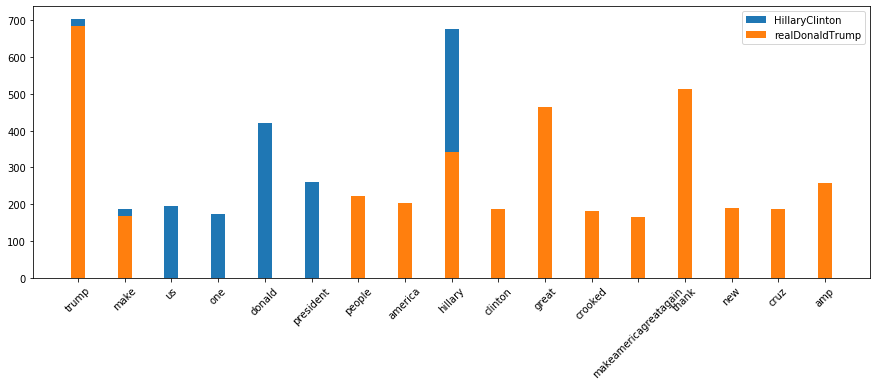

In [0]:
## Answer to Q1
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopWords = set(stopwords.words('english'))
stopWords.add('0') # 0 represent all numbers
tweet_words = {
    'HillaryClinton': [0] * len(vocabulary),
    'realDonaldTrump': [0] * len(vocabulary)
}
# count the occurrence of the words 
for t in dataset:
  for word in t.tokens:
    if word not in stopWords:
      tweet_words[t.handle][word_to_ix[word]] += 1
plt.clf()
plt.figure(figsize=(15,5))
# sort and select the top occurrences >= 150
for t in tweet_words:
  x_value = []
  y_value = []
  for (i, value) in enumerate(tweet_words[t]):
    if value >= 150:
      x_value.append(list(vocabulary)[i])
      y_value.append(value)
  plt.bar(x=x_value, width=0.3, height=y_value, label=t)
plt.xticks(rotation=45) 
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

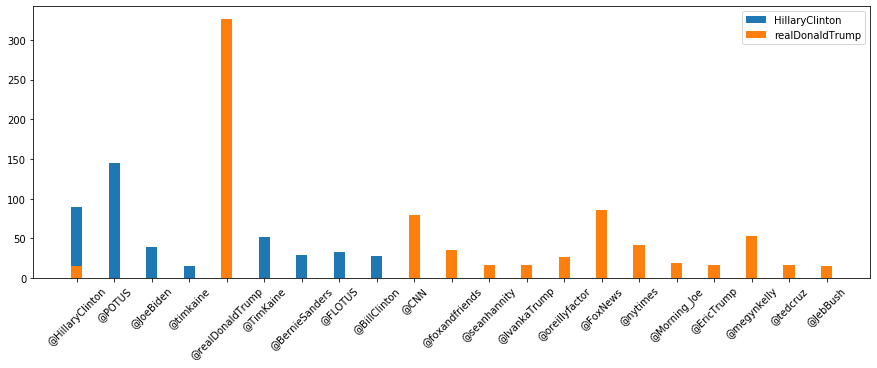

In [0]:
## Answer to Q2
from collections import defaultdict

acount_count = defaultdict(int)
# preserve the handles!
T = tokenizer.TweetTokenizer(regularize=True, preserve_handles=True, preserve_hashes=False, preserve_len=False)
acount_counts = {
    'HillaryClinton': defaultdict(int),
    'realDonaldTrump': defaultdict(int)
}
# count the occurrence of the words 
i = 1
for t in dataset:
  token_incl_acount = T.tokenize(t.text)
  for i in token_incl_acount:
    if i.startswith('@'):
      acount_counts[t.handle][i] += 1
plt.clf()
plt.figure(figsize=(15,5))
for handle in acount_counts:
  # sort and select the top occurrences >= 15
  d = dict((k, v) for k, v in acount_counts[handle].items() if v >= 15)
  plt.bar(x=d.keys(), width=0.3, height=d.values(), label=handle)
plt.xticks(rotation=45) 
plt.legend()
plt.show()

At this point, we are ready to explore more advanced predictive analytics on texts. Therefore, make sure to be up to speed with all text preprocessing concepts that were covered here.

Rule-based systems are among the very first AI systems. They can execute a task by following a set of rules that were predetermined by a human. For example: a very simple rule for a basic thermostat would be to start heating when the temperature drops below 20 degrees, and to switch off when the temperature rises above 22 degrees. Rule-based systems can be powerful, but are not flexible, can become really complex and it is very time consuming to determine a proper set of rules.

Nevertheless, it is always a good exercise to create and experiment with a rule-based AI system. As a matter of exercise, we will build a simple classifier that will predict whether a tweet comes from Donald Trump or from Hillary Clinton based on the principle of **majority voting**. For this, use the following steps. Feel free to tweak the rules of the game!

**Question 3.** For all words in the dataset, count how many times Trump and Hillary use that word. E.g. Trump uses the word 'great' 5623 times, and Hillary only 820 times. It gives you the quantities $N_{H,t}$ and $N_{T,t}$ for resp. the number of times Hillary and Trump use token $t$.


In [0]:
## Answer to Question 3
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import defaultdict

stopWords = set(stopwords.words('english'))
stopWords.add('0') # 0 represent all numbers
words_quantities = {
    'HillaryClinton': defaultdict(int),
    'realDonaldTrump': defaultdict(int)
}
# count the occurrence of the words 
for t in dataset:
  for word in t.tokens:
    if word not in stopWords:
      words_quantities[t.handle][word] += 1

for handle in words_quantities:
  print(words_quantities[handle])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
defaultdict(<class 'int'>, {'question': 5, 'election': 59, 'put': 34, 'plans': 20, 'action': 13, 'make': 188, 'life': 47, 'better': 60, 'last': 57, 'night': 34, 'donald': 420, 'trump': 702, 'said': 46, 'paying': 11, 'taxes': 16, 'smart': 7, 'know': 89, 'call': 15, 'unpatriotic': 1, 'could': 62, 'proud': 50, 'vision': 8, 'command': 1, "night's": 5, 'debate': 26, 'showed': 5, 'ready': 35, 'next': 44, 'stand': 48, 'together': 103, "there's": 22, 'nothing': 27, 'sure': 60, 'vote': 99, 'candidates': 9, 'asked': 15, "they'd": 2, 'confront': 3, 'racial': 5, 'injustice': 8, 'one': 173, 'real': 39, 'answer': 12, 'important': 21, 'sit': 6, 'go': 64, 'registered': 16, 'nationalvoterregistrationday': 7, 'h': 105, 'goes': 9, 'lowregister': 1, 'offered': 4, 'single': 10, 'proposal': 7, 'reduce': 5, 'friction': 1, 'starting': 4, 'business': 51, 'weeks': 3, 'away': 13, 'check': 11, 't

**Question 4.** Now take a new tweet (not in the dataset) and for every word (token) in that tweet, perform majority voting. If $N_{H,t} > N_{T,t}$, a vote is given to Hillary for that tweet. Otherwise, Trump gets a vote.
Whoever gets the most votes for the given tweet, is the winner, and is therefore also the predicted author of the tweet.
Test this on the tweet given below.

In [0]:
tweet_to_classify = "make america great again"

## Answer to Question 4
T = tokenizer.TweetTokenizer(regularize=True, preserve_handles=False, preserve_hashes=False, preserve_len=False)
test_tokens = T.tokenize(tweet_to_classify)
vote_H = 0
vote_T = 0
for token in test_tokens:
  N_H_t = words_quantities['HillaryClinton'][token]
  N_T_t = words_quantities['realDonaldTrump'][token]
  print(token)
  print('N_H_t:', N_H_t, 'N_T_t:', N_T_t)
  if N_H_t>N_T_t:
    vote_H += 1
  elif N_H_t<N_T_t:
    vote_T += 1
print('votes_H:', vote_H)
print('votes_T:', vote_T)
if (vote_H > vote_T):
  winner = 'HillaryClinton'
elif (vote_H<vote_T):
  winner = 'realDonaldTrump'
else:
  winner = 'none'
print('the predicted author of the tweet is', winner)

make
N_H_t: 188 N_T_t: 168
america
N_H_t: 185 N_T_t: 204
great
N_H_t: 64 N_T_t: 464
again
N_H_t: 0 N_T_t: 0
votes_H: 1
votes_T: 2
the predicted author of the tweet is realDonaldTrump



# Part 2 - Sentiment Analysis
---

## Machine Learning in Python


<center> 
<img src="img/scikit-learn-logo.png" style="max-width: 120px; display: inline" />
<img src="img/numpy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/scipy-logo.png" style="max-width: 120px; display: inline" />
<img src="http://localhost:8888/static/base/images/logo.png" style="max-width: 120px; display: inline" />
<img src="img/matplotlib-logo.png" style="max-width: 120px; display: inline"/>
<img src="img/pandas-logo.png" style="max-width: 120px; display: inline" />
</center>

### Scikit-Learn

* Machine learning library written in __Python__
* __Simple and efficient__, for both experts and non-experts
* Classical, __well-established machine learning algorithms__
* Shipped with <a href="http://scikit-learn.org/dev/documentation.html">documentation</a> and <a href="http://scikit-learn.org/dev/auto_examples/index.html">examples</a>


In [46]:
# if necessary, install the needed packages by uncommenting the following lines:
! conda install numpy scipy scikit-learn jupyter matplotlib  -y
! conda install python-graphviz -y
! pip install pydotplus

import warnings
warnings.filterwarnings('ignore')

# Optimized operations on arrays and lists
import numpy as np

# Data processing
import pandas as pd

# General machine Learning
import sklearn

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/bin/bash: conda: command not found
/bin/bash: conda: command not found


---
# Data 

## IMDB Movie Reviews

<img src="https://www.dropbox.com/s/1sgprf9bmsva487/bowman_imdb.PNG?dl=1" width=50%>

**Question:**
- Load in the IMDB reviews stored as csv file `data/train.csv` using `pandas.read_csv()`
- Print the column headers of the csv file

In [59]:
## Answer:
import pandas as pd

df_train = pd.read_csv('train.csv')
print(df_train.columns)


Index(['id', 'label', 'rating', 'text'], dtype='object')


## Data Exploration

**Questions:**
- How many reviews are included in the collection?
- How many different tokens are used in the reviews? 
- What is the average rating of all the reviews?
- What is the average length of a review?

Note: alle text has been tokenized and seperated using white space, thus, calling `.split()` on text is sufficient for tokenization in this tutorial.

In [57]:
## Answer:
num_reviews = len(df_train)
print(num_reviews, ' reviews are included in the collection')

num_token = set()
for line in df_train['text']:
  num_token.update(line.split())

print(len(num_token), ' different tokens are used in the reviews')

average_rate = df_train['rating'].mean()
print('The average rating of all the reviews is ', average_rate)

average_length = df_train['text'].str.len().mean() 
print('The average length of a review is ', average_length)

7792  reviews are included in the collection
17354  different tokens are used in the reviews
The average rating of all the reviews is  2.0690451745379876
The average length of a review is  103.92415297741273


We can now take a look at the rating distribution:

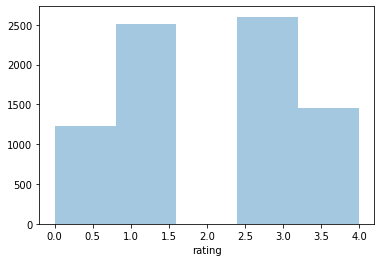

In [61]:
sns.distplot(df_train['rating'], 5, kde=False)

**Question:**
- How is the vocabulary distributed? (Make a histogram of the word counts.)

7792


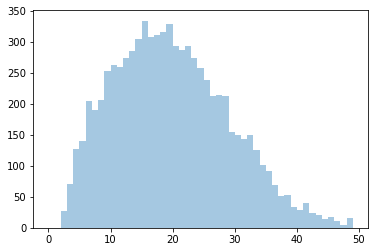

In [62]:
## Answer
import seaborn as sns

print(len([len(x.split()) for x in df_train['text']]))
sns.distplot([len(x.split()) for x in df_train['text']], range(0,50,1), kde=False)


As an illustration, below is code to visual the word frequencies in a word cloud:

Example text:
 The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .

English stopwords:
 a, about, above, after, again, against, all, also, am, an, and, any, are, aren't, as, at, be, because, been, before, being, below, between, both, br, but, by, can, can't, cannot, com, could, couldn't, did, didn't, do, does, doesn't, doing, don't, down, during, each, else, ever, few, for, from, further, get, had, hadn't, has, hasn't, have, haven't, having, he, he'd, he'll, he's, her, here, here's, hers, herself, him, himself, his, how, how's, however, http, i, i'd, i'll, i'm, i've, if, in, into, is, isn't, it, it's, its, itself, just, k, let's, like, me, more, most, mustn't, my, myself, no, nor, not, of, off, on, once, only, or, other, otherwise, ought, our, ours, ourselves, out, over, own, r, same, shall, shan't, she, she'd, she'll, she's, should, shouldn't, since, so, so

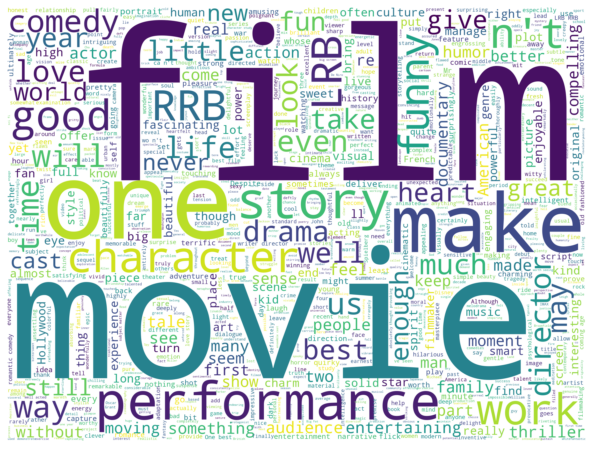

In [64]:
# Illustration: plot frequencies in a word cloud

# if necessary, install the needed packages by uncommenting the following line:
! pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

# Store text from pandas data frame in list
text = ' '.join(df_train['text'][df_train['label']==1]) # join all reviews in training set
print('Example text:\n', df_train['text'][0])

# limit word count
wordcount = 1000
# stop words
stopwords = set(STOPWORDS)
stopwords.add("br")
print('\nEnglish stopwords:\n', ', '.join(sorted(list(stopwords))))

# setup word cloud
wc = WordCloud(scale=3, background_color="white", max_words=wordcount, stopwords=stopwords, width=800, height=600)

# generate word cloud
wc.generate(text)

# show
print('\nWordcloud:')
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


---
# Supervised Machine Learning

Data comes as a finite learning set ${\cal L} = (X, y)$ where
* Input samples are given as an array $X$ of shape `n_samples` $\times$ `n_features`, taking their values in ${\cal X}$;
* Output values are given as an array $y$, taking _symbolic_ values in ${\cal Y}$.

The goal of supervised classification is to build a function $f: {\cal X} \mapsto {\cal Y}$ minimizing the expected error over the training data:

$$
Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}
$$

where $\ell$ is a loss function, e.g., the zero-one loss for classification $\ell_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

### Applications

- Diagnosing disease from symptoms;
- Recognising cats in pictures;
- Identifying body parts with Kinect cameras;
- ...
  

# Feature Extraction

Now that we have the data, we need to build some sort of **feature representation** of our data. One of the simplest things we can do is to represent each sentence as a bag of its words. As part of determining what constitutes a work (or "token"), we'll have to choose how to tokenize the data. Let's do the simplest thing for now and just split on whitespace. More sophisticated methods might use a tokenizer from an outside library, such as NLTK or SpaCy.


The most intuitive way to do so is to use a **Bags of Words** representation using using [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

<img src="https://www.dropbox.com/s/kn9t26hmth9ir18/jakevdp_features.png?dl=1">

Assign a fixed integer id to each word occurring in any document of the training set (for instance by building a dictionary from words to integer indices).
For each document #i, count the number of occurrences of each word w and store it in X[i, j] (row i and column j in the feature matrix X) as the value of feature #j where j is the index of word w in the dictionary.
The bags of words representation implies that n_features is the number of distinct words in the corpus: this number is typically larger than 100,000.


Fortunately, most values in X will be zeros since for a given document less than a few thousand distinct words will be used. For this reason we say that bags of words are typically high-dimensional **sparse** datasets. We can save a lot of memory by only storing the non-zero parts of the feature vectors in memory.

scipy.sparse matrices are data structures that do exactly this, and scikit-learn has built-in support for these structures

Below, we 
- Import a `CountVectorizer` from the `sklearn.feature_extraction.text` package. 
- Create a `CountVectorizer` object named `tokenizer`

[See documentation for parameters of this object](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [0]:
# creating a tokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tokenizer = CountVectorizer()

# <span style="color:blue">Exercise 1 </span>

- The `fit()` method of the vectorizer object learns a vocabulary dictionary of all tokens in the raw documents. Fit the tokenizer using `tokenizer.fit()`. Explore the tokenizer object (e.g. `dir(tokenizer)`) and the fit function (e.g., `help(tokenizer.fit)`)
- Transform text from the training collection using `tokenizer.transform(data['text'])` into a vector named `X`
- Print the dimensions of the feature-matrix, `X`
- Print the tokenizer dictionary using `tokenizer.vocabulary_`
- Show the feature representation of the first document: what features are non-zero?

- Finetune the tokenizer:
 - Specify the tokenizer to strip accents.
 - Create a tokenizer that learns unigrams as well as bigrams, fit the data, and print the number of features.
 - Reduce the tokenizer to remove stopwords, only retain tokens that occur 2 or more times, and print the number of different words
 - Reduce to only the 5.000 most often occurring tokens. 

In [0]:
# dir(tokenizer)
# help(tokenizer)

In [158]:
## Answer to exercise 1

tokenizer = CountVectorizer()
# earns a vocabulary dictionary of all tokens in the raw documents
tokenizer.fit(df_train['text'])

# Transform text from the training collection into a vector named X
x = tokenizer.transform(df_train['text']) 

#  Print the dimensions of the feature-matrix
print('dimensions of the feature-matrix is\n', x.shape)

# Print the tokenizer dictionary
print('tokenizer dictrionary:\n', tokenizer.vocabulary_)

# Show the feature representation of the first document
print('the feature representation of the first document:\n', tokenizer.transform([doc1]).toarray())
bt = tokenizer.build_tokenizer()
doc1 = df_train.loc[0, 'text']
token1 = bt(doc1)
nz_tokens = []
z_tokens = []
for token in token1:
  if token in tokenizer.vocabulary_:
    nz_tokens.append(token)
  else:
    z_tokens.append(token)
print(nz_tokens, 'is none-zero')
print(z_tokens, 'is zero')

## Finetune the tokenizer
tokenizer = CountVectorizer(strip_accents='ascii') # Specify the tokenizer to strip accents.

tokenizer = CountVectorizer(strip_accents='ascii',  # Create a tokenizer that learns unigrams as well as bigrams
                            ngram_range=(1, 2))
x = tokenizer.fit_transform(df_train['text']) 
print('the number of features (learns unigrams as well as bigrams):\n', len(tokenizer.get_feature_names()))

tokenizer = CountVectorizer(strip_accents='ascii', # Reduce the tokenizer to remove stopwords, only retain tokens that occur 2 or more times
                            ngram_range=(1, 2),
                            stop_words='english',
                            min_df = 2) 
x = tokenizer.fit_transform(df_train['text']) 
print('the number of different words (remove stopwords, only retain tokens that occur 2 or more times):\n', len(tokenizer.get_feature_names()))

tokenizer = CountVectorizer(strip_accents='ascii', # Reduce to only the 5.000 most often occurring tokens.
                            ngram_range=(1, 2),
                            stop_words='english',
                            max_features=5000) 
x = tokenizer.fit_transform(df_train['text']) 
print('the number of different words (only the 5.000 most often occurring tokens):\n', len(tokenizer.get_feature_names()))

dimensions of the feature-matrix is
 (7792, 14599)
tokenizer dictrionary:
 {'the': 12948, 'rock': 10854, 'is': 6924, 'destined': 3455, 'to': 13133, 'be': 1153, '21st': 74, 'century': 2050, 'new': 8660, 'conan': 2599, 'and': 601, 'that': 12947, 'he': 5969, 'going': 5585, 'make': 7845, 'splash': 12070, 'even': 4470, 'greater': 5693, 'than': 12943, 'arnold': 781, 'schwarzenegger': 11178, 'jean': 7002, 'claud': 2308, 'van': 13881, 'damme': 3128, 'or': 8964, 'steven': 12264, 'segal': 11301, 'gorgeously': 5623, 'elaborate': 4127, 'continuation': 2756, 'of': 8864, 'lord': 7692, 'rings': 10807, 'trilogy': 13338, 'so': 11868, 'huge': 6280, 'column': 2472, 'words': 14437, 'can': 1882, 'not': 8746, 'adequately': 298, 'describe': 3424, 'co': 2401, 'writer': 14492, 'director': 3583, 'peter': 9425, 'jackson': 6960, 'expanded': 4585, 'vision': 14017, 'tolkien': 13149, 'middle': 8167, 'earth': 4037, 'singer': 11640, 'composer': 2582, 'bryan': 1712, 'adams': 279, 'contributes': 2774, 'slew': 11748, 'so

---
# Classification Models

The goal of supervised classification is to build a function $f: {\cal X} \mapsto {\cal Y}$ minimizing

$$
Err(f) = \mathbb{E}_{X,Y}\{ \ell(Y, f(X)) \}
$$

where $\ell$ is a loss function, e.g., the zero-one loss for classification $\ell_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

## Decision Tree

**Decision Trees** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a token occurs in a review or not), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

[A visual introduction to decision trees](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

<img src="https://www.dropbox.com/s/yoq17ki09oy6nfq/jakevdp_decision_tree.png?dl=1" width=400px>

- Import the `DecisionTreeClassifier` from the `sklearn.tree` module. [See documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- Create a `DecisionTreeClassifier` object named `dt_clf`; limit the number of leaf nodes to 5 and use information gain as criterion.

In [0]:
## Answer
from sklearn.tree import DecisionTreeClassifier 

dt_clf = DecisionTreeClassifier(max_leaf_nodes=5, # limit the number of leaf nodes to 5 and use information gain as criterion.
                                criterion='entropy')


In order to learn the "best" parameters for our model based on the training data, use scikit-learn’s `dt_clf.fit(features, vectors)` method. Inside this method, the parameters are according to some loss function (see slides).

- Store sentiment labels in a `y` variable
- Fit the classifier object calling the `fit()` method

In [267]:
## Answer

tokenizer = CountVectorizer(strip_accents='ascii', # Reduce to only the 5.000 most often occurring tokens.
                            ngram_range=(1, 2),
                            stop_words='english',
                            max_features=5000) 
X = tokenizer.fit_transform(df_train['text']) 

y = df_train['label'] 
dt_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

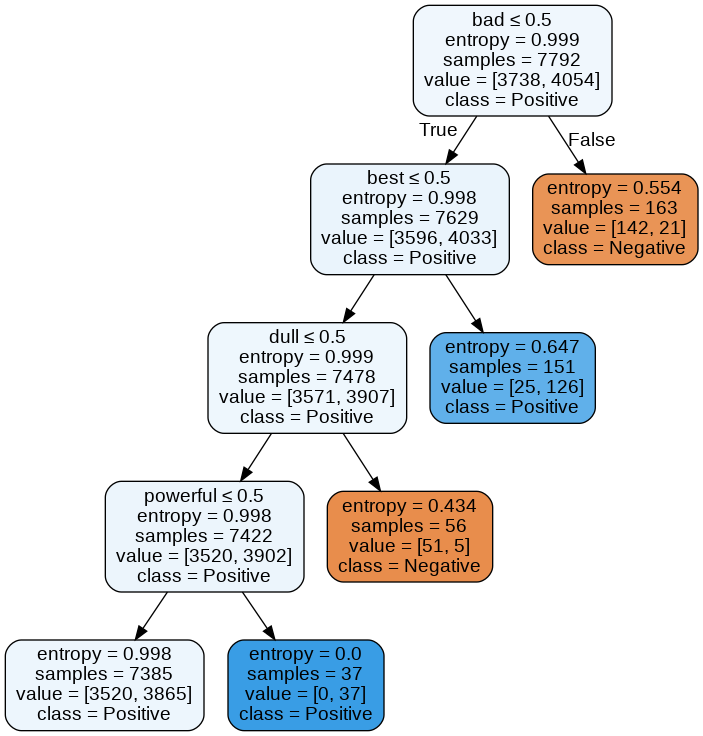

In [176]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import graphviz

dot_data = export_graphviz(dt_clf, 
                           feature_names=list(tokenizer.get_feature_names()),
                           filled=True, 
                           rounded=True,
                           special_characters=True, class_names=['Negative', 'Positive'])
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

What feature is tested first? Does this decision correspond with your intuition? 
What about the 2nd test?

[link text](https://)**<< Insert your answer here in MarkDown >>** 

Q1: The token 'bad' is tested first as a feature.

Q2: The decision corresponded with my intuition. 

Q3: The token 'best' is tested for the 2nd test. The decision also corresponded with the intuition.

## Naive Bayes Classification

__Naive Bayes classifiers__ are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of __conditional probabilities__ of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label $y$ given some observed features, which we can write as $P(y~|~{\rm x})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(y~|~{\rm x}) = \frac{P({\rm x}~|~y)P(y)}{P({\rm x})}
$$

If we are trying to decide between negative and positive—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\underset{y \in \{negative, positive\}}{\text{argmax}} P(y|x)
$$

All we need now is some model by which we can compute $P({\rm x}~|~y)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label (i.e., the independence of co-occuring words), we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.


## Logistic Regression

__Logistic regression__ models the probability $P(y|x;w)$ that a review, $x$, falls into a specific category $y \in \{0,1\}$ (negative, positive). Using a vector of weights, w. 

If $P(y=1|x;w)$ > 0.5 then class positive is selected

- For Bag-of-Words vector
$$x = [x_1,x_2,...,x_{|V|}], x \in \mathbb{R}^{|V|} $$

- Parameter vector (One per class)
$$w = [w_1,w_2,...,w_{|V|}], w \in \mathbb{R}^{|V|} $$

- Linear scoring function $f$
$$f_w{(x)} = w_1x_1+w_2x_2+...+w_{|V|}x_{|V|} = w^Tx \in \mathbb{R}$$

- Simgoid Function
$$\sigma(z) = \frac{1}{1+e^{-z}} \in [0,1]$$

As $z$ goes from $-\infty$ to $\infty$, $\sigma(z)$ goes from 0 to 1

<img src="https://www.dropbox.com/s/tt0q4ktc4na12yr/sigmoid.png?dl=1">


$$P(y=\text{positive}|x;w) = \sigma(f_w(x)) $$

$$  = \frac{1}{1+e^{-(w^Tx)}}$$


<!-- <img src="img/lr.png" width=300px> -->

$$log P(y=\text{positive}|x;w)= - log(1+e^{{-(w^Tx)}}) $$


**Learning** is formulated as the maximizing the likelihood of the correct answer or minimizing the negative log of the likelihood (probability) of the correct answer
 



$$ \underset{\text{w}\in R^{|V|}}{min}\sum_{i}^{N} log(1+e^{{-(w^Tx)}}) $$

if $\sigma(f(x))$ > 0.5 then class y = positive is selected

---

# <span style="color:blue">Exercise 2 </span>

- Import the `BernoulliNB` from the `sklearn.naive_bayes` module. [See documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)
- Create a new BernoulliNB object named `nb_clf`
- Fit the model on the data
- Which are the most significant tokens for both classes? One way to measure the importance of tokens to compute the ratio of the posterior probabilities for each label. Print the feature-weights and feature names learned by the classifier using `tokenizer.get_feature_names()` and `nb_clf.feature_log_prob_`. 


$$\frac{P(y = \text{positive}~|~{\rm x})}{P(y = \text{negative}~|~{\rm x})}$$

$$ log(P(y = \text{positive}~|~{\rm x})) - log(P(y = \text{negative}~|~{\rm x})) $$


In [265]:
## Answer
from sklearn.naive_bayes import BernoulliNB
import numpy as np
nb_clf = BernoulliNB()
nb_clf.fit(X, y)

# significant tokens 
features_name = tokenizer.get_feature_names()
features_weights = nb_clf.feature_log_prob_
print('feature names are:\n', features_name)
print('feature-weights are:\n', features_weights)

# find the most significant tokens for both classes
result = np.where(features_weights[0] == np.amax(features_weights[0]))
print('most significant token for class 0:\n', features_name[int(result[0])])
result = np.where(features_weights[1] == np.amax(features_weights[1]))
print('most significant token for class 1:\n', features_name[int(result[0])])

feature names are:
 ['10', '10 minutes', '100', '101', '11', '12', '13', '15', '19', '19th', '19th century', '20', '20 years', '2002', '20th', '21st', '21st century', '30', '40', '4ever', '50', '50s', '51', '60', '60s', '70s', '80', '84', '84 minutes', '86', '86 minutes', '88', '88 minute', '90', '90 minute', '90 minutes', '94', '95', 'abandon', 'ability', 'able', 'absolute', 'absolutely', 'absorbing', 'abstract', 'absurd', 'absurdist', 'absurdities', 'absurdity', 'abuse', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'accepting', 'access', 'accessible', 'accident', 'accomplished', 'according', 'account', 'accurate', 'accurately', 'ache', 'achieve', 'achievement', 'achieves', 'achingly', 'act', 'acted', 'acting', 'action', 'action comedy', 'action film', 'action films', 'action flick', 'action hero', 'action movie', 'action packed', 'action scenes', 'action sequences', 'action thriller', 'actions', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual', 'actually', 'adam

- Import the `LogisticRegression` from the `sklearn.linear_model` module. [See documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- Create a new LogisticRegression object named `lr_clf`
- Fit the model on the data
- Print the feature-weights, $w$, and tokens learned by the classifier using `tokenizer.get_feature_names()` and `lr_clf.coef_`. Which are the most important ones for both classes? Weights provide insights into important features, which tokens are weighted strongly for both classes?

In [266]:
## Answer:

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X, y)
w = lr_clf.coef_
result = np.where(w == np.amax(w))
print('most important ones for both classes:\n', features_name[int(result[0])])


most important ones for both classes:
 10


We now have a trained sentiment analysis model.

In the next section we'll evaluate our models.

---

# Evaluation

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the predict() method. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

How well does our model do? Let's define a function to see our model's accuracy on some data split and see how well we fit the training data. We'll make use of the `clf.predict()` interface for generating predictions.


### Metrics: Accuracy, Precision, Recall, F$_1$

<img src="https://www.dropbox.com/s/xhjwoqd6tnxxaeb/bowman_metrics.png?dl=1" width=800px>

$$F = \frac{2 * Precision * Recall}{Precision + Recall}$$

- Import all the metrics mentioned above from the `sklearn.metrics` module 

In [0]:
## Answer: import metrics

from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score



## Overfitting


- Evaluate accuracy by a classifier on the same data it was trained on using `clf.predict()` and `classification_report`

In [280]:
## Answer:

from sklearn.metrics import classification_report

y_pred = lr_clf.predict(X)
print(classification_report(y, y_pred, target_names=['Negative', 'Positive']))


              precision    recall  f1-score   support

    Negative       0.92      0.94      0.93      3738
    Positive       0.94      0.93      0.93      4054

    accuracy                           0.93      7792
   macro avg       0.93      0.93      0.93      7792
weighted avg       0.93      0.93      0.93      7792



Issue: the training error is a __biased__ estimate of the generalization error.

Solution: Divide ${\cal L}$ into disjoint parts called training and test sets (a common choice is using 80% for training and 20% for test).
- Use the training set for fitting the model;
- Use the test set for evaluation only, thereby yielding an unbiased estimate.

This could be done by hand, but it is more convenient to use the `train_test_split` utility function from `sklearn.model_selection`.

- import the `train_test_split` of the `sklearn.model_selection` module
- Create a `X_train`, `X_test`, `y_train`, `y_test` from the data collection 
- Print the shapes of the new arrays

In [291]:
## Answer:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y)

print('shape of X_train:\n', X_train.shape)
print('shape of y_train:\n', y_train.shape)
print('shape of X_val:\n', X_val.shape)
print('shape of y_valt:\n', y_val.shape)

shape of X_train:
 (5844, 5000)
shape of y_train:
 (5844,)
shape of X_val:
 (1948, 5000)
shape of y_valt:
 (1948,)



- How well do we do on held-out data? Evaluate accuracy by a Logistic regression classifier on the test data using `clf.predict(X_test)`



In [292]:
## Answer:

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_val)

print(classification_report(y_val, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.77      0.74      0.76       954
    Positive       0.76      0.79      0.78       994

    accuracy                           0.77      1948
   macro avg       0.77      0.77      0.77      1948
weighted avg       0.77      0.77      0.77      1948



We see a big drop, ~20 accuracy, on held-out data, so we overfit the training data. We can go back and revise our approach (e.g. by playing around with the different parameters for the [logistic regression classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) and re-fitting on the training data, and then see how well we do on the held-out validation data.

By doing this, however, we'll be fitting to the validation data. At some point, we'll want to evaluate one completely new data. Which is what the test split is for. The test split should be used as sparingly as possible!


In [295]:
clf = lr_clf
print(classification_report(y_val, clf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       954
           1       0.76      0.79      0.78       994

    accuracy                           0.77      1948
   macro avg       0.77      0.77      0.77      1948
weighted avg       0.77      0.77      0.77      1948



# Regularization

When models have enough flexibility to nearly perfectly account for the fine features in the data, they 
can learn to very accurately describe the training data. The model's precise form can become more reflective of the particular noise properties of the training data (which will be different in held-out data) than the intrinsic properties of whatever process generated that data (i.e., the actual 'signal' in the data, which will be present in held-out data as well).

Such a model is said to __*overfit*__ the data: that is, it has so much model flexibility that the model ends up accounting for random errors as well as the underlying data distribution; another way of saying this is that the model has high __*variance*__, and it may poorly perform on unseen data.

A model is said to __*underfit*__ the data when it does not have enough model flexibility to suitably account for all the features in the data; another way of saying this is that the model has high __*bias*__.

Overfitting can be countered in many ways.  In this tutorial we focus on the technique of __*regularization*__ of a logistic regression classifier.
Learning in Logistic Regression is formulated as the optimization of

$$ \underbrace{\underset{\text{w}\in R^{|V|}}{min}\sum_{i}^{N} log(1+e^{{-(\sigma(w^Tx))}})}_{Loss}$$

When a linear model overfits, weights tend to become very large. One way to counter this, is to penalize large weights by adding an additional component to the loss function called a regularization.

$$ \underbrace{\underset{\text{w}\in R^{|V|}}{min}\sum_{i}^{N} log(1+e^{{-(\sigma(w^Tx))}})}_{Loss} + \underbrace{\frac{1}{C} ||w||^2}_{Regularization}$$





- What is the effect of the `C` parameter on the generalization performance? Evaluate in terms of accuracy, as well as the distribution (e.g., make a histogram) of the weight coefficients.

In [0]:
## Answer:










## The Bias-Variance trade-off

Fundamentally, the question of "the best model" is about finding a sweet spot in the tradeoff between *bias* and *variance*.


- __Under-fitting, High Bias__: the model is too simple and does not capture the true relation between X and Y.
- __Over-fitting, High Variance__: the model is too specific to the training set and does not generalize.

In [0]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier 

# Evaluate parameter range in CV
param_range = [0.001,0.01,0.1,0.4,0.6,1,1.2,1.4,1.6,2]
param_name = "C"
clf = LogisticRegression()

train_scores, test_scores = validation_curve(
    clf, X, y, 
    param_name=param_name, 
    param_range=param_range, cv=2, n_jobs=-1, scoring="accuracy")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot parameter VS estimated error
plt.figure(figsize=(8,6))
plt.xlabel(param_name)
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, train_scores_mean, color="blue", label="Training acc.")
plt.fill_between(param_range, 
                 train_scores_mean + train_scores_std,
                 train_scores_mean - train_scores_std,
                 alpha=0.2, color="blue")
plt.plot(param_range, test_scores_mean, color="red", label="CV acc.")
plt.fill_between(param_range, 
                 test_scores_mean + test_scores_std,
                 test_scores_mean - test_scores_std, 
                 alpha=0.2, color="red")
plt.legend(loc="best")

print(test_scores)

<table>
<tr><td><p style="clear: both;"> <img src="https://www.dropbox.com/s/mpmrstr7k5z0lku/jakevdp_biasvariance.png?dl=1" width=400px></td><td> <img src="https://www.dropbox.com/s/4dyuvb3b6swwcgy/louppe_bv.png?dl=1" width=400px> <td>
</tr>
</table>

## Cross Validation

When evaluating different settings (___hyperparameters___) for estimators, such as the $C$ setting that must be manually set for a logistic regression, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can ___leak___ into the model and evaluation metrics no longer report on generalization performance. To solve this problem, the data not used for training is split into a ___validation set___ and the actual ___test set___. Training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called __cross-validation__ (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into $k$ smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

A model is trained using all but one of the folds as training data;
the resulting model is evaluated on the remaining part of the data (i.e., it is used as a validation set to compute a performance measure such as accuracy).
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

<img src="https://www.dropbox.com/s/132oue6yj29cml3/jakevdp_cross.png?dl=1" width=600px>

- What is the average accuracy over five folds of training, for a logistic regression classifier with default parameters (in sklearn)?

In [0]:
## Answer






<img src="https://www.dropbox.com/s/6qqluvighbqub27/epfl_traintest.PNG?dl=1" width=600px>

__Summary__: Beware of bias when you estimate model performance:
* Training score is often an optimistic estimate of the true performance;
* __The same data should not be used both for training and evaluation.__

# <span style="color:blue">Exercise 3</span> 



- Experiment with other measures for regularization of the models  discussed during the session
    - What is $l1$ and $l2$ regularization and what is the effect on the weights when changing the `penalty` parameter of the LogisticRegression object to `l1`?
    - What is the effect of the `max_features` parameter of the tokenizer?
- Which of the models performs best on the validation data? Discover and import other models from the sklearn package ([KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), ...)
- Can you think of ways to combine predictions by different classifiers? 
- A held-out collection of reviews is stored in `data/test.csv`. In the remaining time, try to maximize your model's performance on the CV splits without evaluating on it (until the end of class). How you go about that is completely open (feature engineering, modeling, optimization, etc.).

In [0]:
## Answer









## Bonus: Kaggle Competition
- Congratulations! You have made your first sentiment classifier and predicted sentiment for a held-out collection of movie reviews. The ground truth for the held-out data is stored on the online data science platform Kaggle. 
- What is the performance of your model? How do you rank among your peers?
- Now try to improve your model by adding new models, vectorizers, additional data,... (talk to us or go looking online to get ideas)
- Think of ways to include knowledge from external sources in your model. 
- Submit your predictions to the in-class [Kaggle Competition](https://www.kaggle.com/c/ugentnlp-sentiment). This competition is private and will be removed. We will keep it open up until the deadline for submitting this notebook (i.e., next Sunday at 11:59PM). 
- Feel free to comment on any successful submissions, or provide insights into which methods worked better than others. However, this remains optional.

__Keep in mind, the limit of submissions is set at 20 per day!__

## Tutorial based on

- [NYU Course - Introduction to Natural Language Understanding - Samuel Bowman](https://docs.google.com/document/d/1kXhxA4iit2fhAJJGOb32bb151cKLJtW8xWuyMVwqD6s/edit)
- [Introduction to Scikit Learn - Gilles Louppe](https://github.com/glouppe/tutorials-scikit-learn)
- [EPFL Introduction to Deep Learning - François Fleuret](https://fleuret.org/ee559/)